In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
#Loading data :
train = pd.read_csv(r'D:\Kaggle\Store Item Demand Forecasting Challenge\data\train.csv', parse_dates=['date'])
test = pd.read_csv(r'D:\Kaggle\Store Item Demand Forecasting Challenge\data\test.csv', parse_dates=['date'])
sample_sub = pd.read_csv(r'D:\Kaggle\Store Item Demand Forecasting Challenge\data\sample_submission.csv')
print('Train shape:{}, Test shape:{}'.format(train.shape, test.shape))
train.head()

Train shape:(913000, 10), Test shape:(45000, 4)


,date,store,item,sales,dayofmonth,dayofyear,dayofweek,month,year,weekofyear
0,2013-01-01,1,1,13,1,1,1,1,2013,1
1,2013-01-02,1,1,11,2,2,2,1,2013,1
2,2013-01-03,1,1,14,3,3,3,1,2013,1
3,2013-01-04,1,1,13,4,4,4,1,2013,1
4,2013-01-05,1,1,10,5,5,5,1,2013,1


In [4]:
#Number of unique store and item :
print("number of unique items :",train.item.nunique())
print("number of unique store :",train.store.nunique())

number of unique items : 50
number of unique store : 10


In [5]:
#date features :
train['dayofmonth'] = train.date.dt.day
train['dayofyear'] = train.date.dt.dayofyear
train['dayofweek'] = train.date.dt.dayofweek
train['month'] = train.date.dt.month
train['year'] = train.date.dt.year
train['weekofyear'] = train.date.dt.weekofyear
train.head()

,date,store,item,sales,dayofmonth,dayofyear,dayofweek,month,year,weekofyear
0,2013-01-01,1,1,13,1,1,1,1,2013,1
1,2013-01-02,1,1,11,2,2,2,1,2013,1
2,2013-01-03,1,1,14,3,3,3,1,2013,1
3,2013-01-04,1,1,13,4,4,4,1,2013,1
4,2013-01-05,1,1,10,5,5,5,1,2013,1


#### Visualization : 

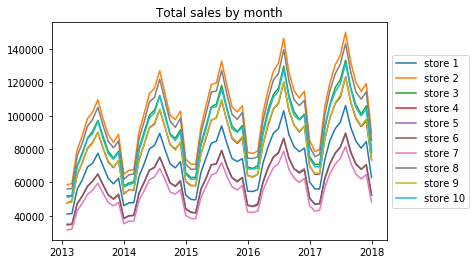

In [6]:
for i in range(1,11):
    month_df = train[train.store==i].resample('M',on='date').sum()
    x= np.array(month_df.index)
    y=np.array(month_df.sales)
    plt.plot(x,y,label = 'store %s' % i)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Total sales by month")
plt.show()

Text(0.5,1,'Store/ Item sales heatmap')

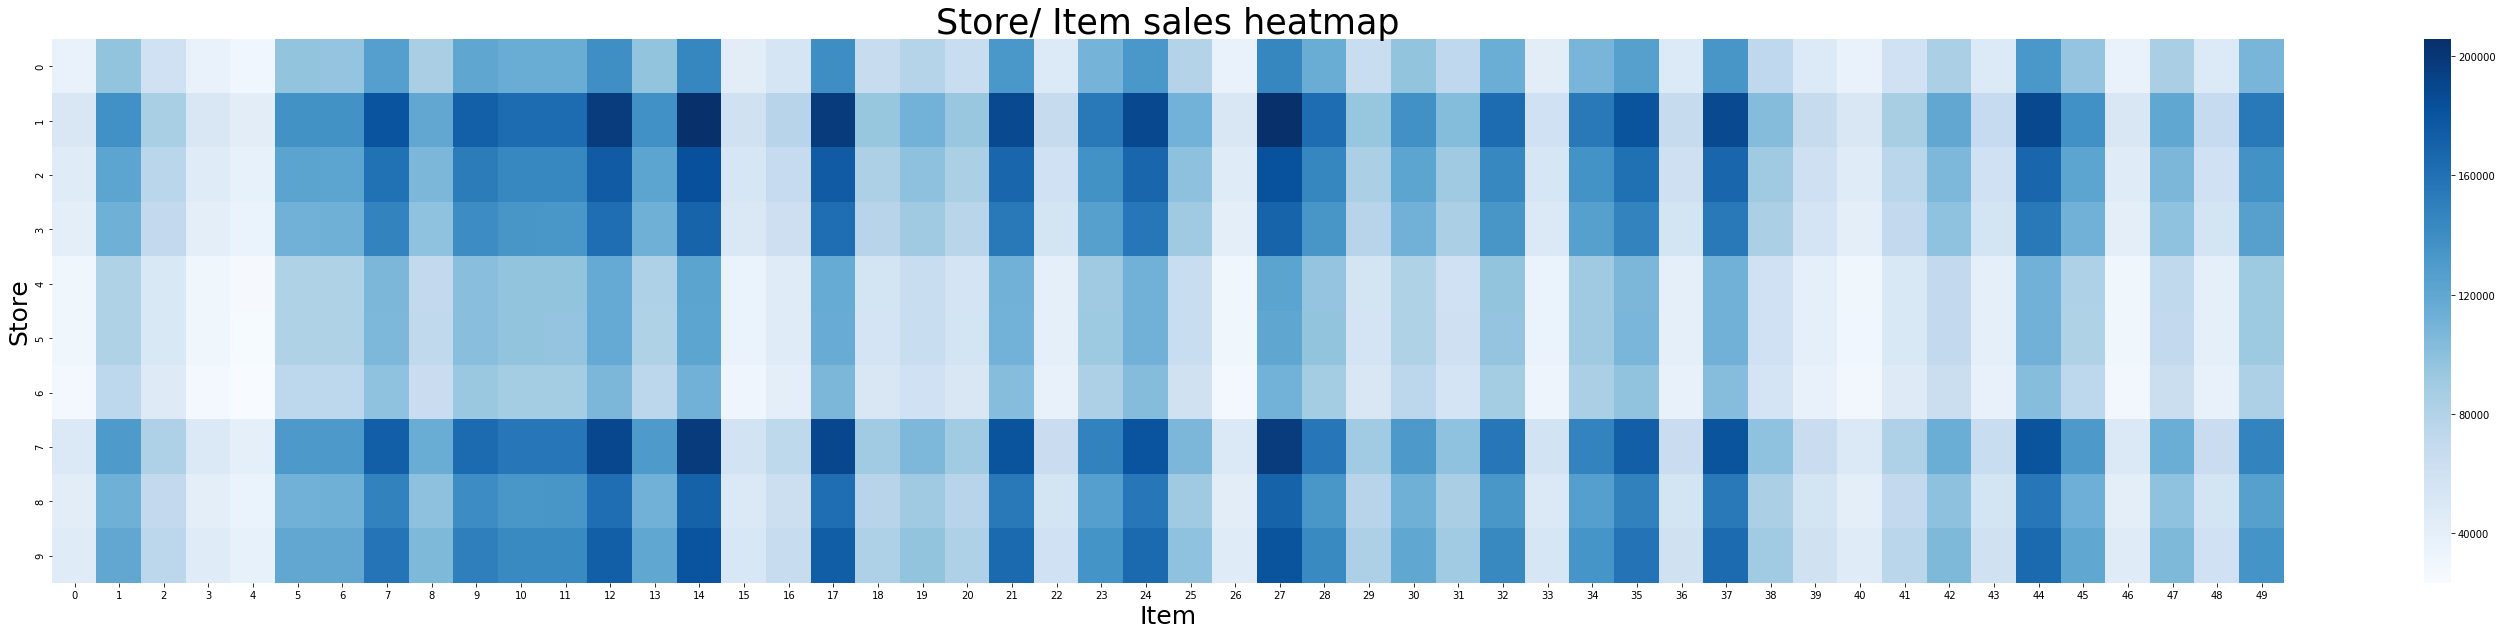

In [7]:
store_item_df = train.groupby(['store','item']).sum()
matrixStoreItem = np.zeros((10,50))
for i in range(1,11):
    for j in range(1,51):
        matrixStoreItem[i-1,j-1] = store_item_df.loc[i,j].sales

plt.figure(figsize=(50,10))
ax = sns.heatmap(matrixStoreItem,cmap='Blues')
plt.xlabel("Item",fontsize = 25)
plt.ylabel("Store",fontsize=25)
plt.title("Store/ Item sales heatmap",fontsize=35)

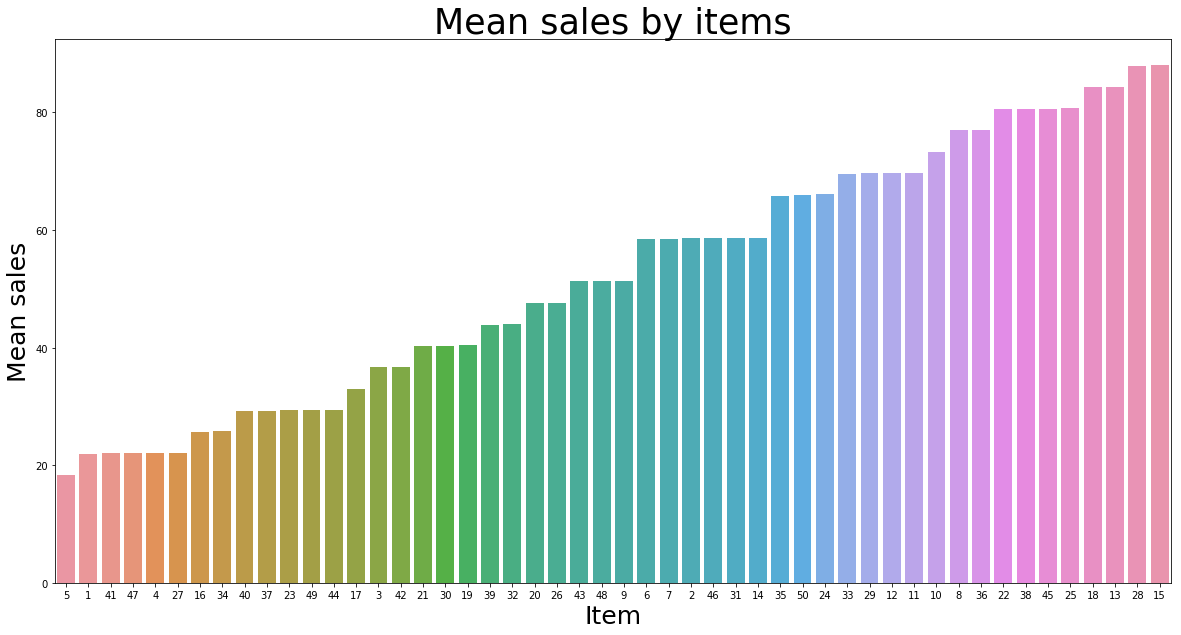

In [10]:
plt.close('all')
item_df = train.groupby(['item']).mean()
item_df.sort_values('sales',ascending=True,inplace=True)
x = item_df.index
y = item_df.sales
plt.figure(figsize=(20,10))
sns.barplot(x=x, y=y, order=x)
plt.xlabel("Item",fontsize = 25)
plt.ylabel("Mean sales",fontsize=25)
plt.title("Mean sales by items",fontsize=35)
plt.show()

In [36]:
# dummies features : 
df = pd.get_dummies(train, columns = ['store','item','dayofmonth','dayofweek','month','weekofyear'])
df.head()

,date,sales,dayofyear,year,store_1,store_2,store_3,store_4,store_5,store_6,...,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,weekofyear_53
0,2013-01-01,13,1,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013-01-02,11,2,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013-01-03,14,3,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013-01-04,13,4,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013-01-05,10,5,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#train and validation dataframe :
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_val = df[~msk]
print("train shape: ",df_train.shape)
print("validation shape :",df_val.shape)

train shape:  (730547, 167)
validation shape : (182453, 167)


In [42]:
df_train.drop('date',axis=1,inplace=True)
df_val.drop('date',axis=1,inplace=True)
y_train = df_train['sales'].values
y_test = df_val['sales'].values
X_train = df_train.drop('sales', axis=1).values
X_test = df_val.drop('sales', axis=1).values

C:\Users\adrien\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\adrien\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [77]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {'task':'train', 'boosting_type':'gbdt', 'objective':'regression', 
              'metric': {'rmse'}, 'num_leaves': 10, 'learning_rate': 0.05, 
              'feature_fraction': 0.8, 'max_depth': 5, 'verbose': 0, 
              'num_boost_round':15000, 'early_stopping_rounds':100, 'nthread':-1}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

C:\Users\adrien\Anaconda3\lib\site-packages\lightgbm\engine.py:102: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\adrien\Anaconda3\lib\site-packages\lightgbm\engine.py:107: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's rmse: 28.507
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 28.2792
[3]	valid_0's rmse: 28.0935
[4]	valid_0's rmse: 27.8795
[5]	valid_0's rmse: 27.7018
[6]	valid_0's rmse: 27.5154
[7]	valid_0's rmse: 27.3209
[8]	valid_0's rmse: 27.1495
[9]	valid_0's rmse: 26.9731
[10]	valid_0's rmse: 26.8095
[11]	valid_0's rmse: 26.6364
[12]	valid_0's rmse: 26.4643
[13]	valid_0's rmse: 26.3138
[14]	valid_0's rmse: 26.1423
[15]	valid_0's rmse: 25.9809
[16]	valid_0's rmse: 25.8087
[17]	valid_0's rmse: 25.6434
[18]	valid_0's rmse: 25.4847
[19]	valid_0's rmse: 25.3504
[20]	valid_0's rmse: 25.218
[21]	valid_0's rmse: 25.0944
[22]	valid_0's rmse: 24.9505
[23]	valid_0's rmse: 24.8089
[24]	valid_0's rmse: 24.6764
[25]	valid_0's rmse: 24.5255
[26]	valid_0's rmse: 24.3807
[27]	valid_0's rmse: 24.2556
[28]	valid_0's rmse: 24.1221
[29]	valid_0's rmse: 24.0165
[30]	valid_0's rmse: 23.8904
[31]	valid_0's rmse: 23.7523
[32]	valid_0's rmse: 23.6273
[33]	valid_0's rmse:

In [82]:
#Prediction : 
#date features :
test['dayofmonth'] = test.date.dt.day
test['dayofyear'] = test.date.dt.dayofyear
test['dayofweek'] = test.date.dt.dayofweek
test['month'] = test.date.dt.month
test['year'] = test.date.dt.year
test['weekofyear'] = test.date.dt.weekofyear
test.drop('date',axis=1,inplace=True)
test.head()

,id,store,item,dayofmonth,dayofyear,dayofweek,month,year,weekofyear
0,0,1,1,1,1,0,1,2018,1
1,1,1,1,2,2,1,1,2018,1
2,2,1,1,3,3,2,1,2018,1
3,3,1,1,4,4,3,1,2018,1
4,4,1,1,5,5,4,1,2018,1


In [83]:
df_test = pd.get_dummies(test, columns = ['store','item','dayofmonth','dayofweek','month','weekofyear'])
df_test.drop('id',axis=1,inplace=True)
X_prediction = df_test.values

predictions = gbm.predict(X_prediction,num_iteration=gbm.best_iteration)

In [85]:
sub = test.loc[:,['id']]

In [86]:
sub['sales']= predictions

In [87]:
sub

,id,sales
0,0,12.329488
1,1,13.699432
2,2,14.250143
3,3,15.084378
4,4,17.115899
5,5,17.604610
6,6,17.994479
7,7,12.856291
8,8,14.411711
9,9,14.565351
